<a href="https://colab.research.google.com/github/bhatiatanish225/Training-Titanic-DataSet/blob/main/Classification_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret #installing the packages...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00

In [3]:
from pycaret.utils import version
version() #checking the version....

'3.0.2'

In [4]:
from pycaret.datasets import get_data #importin all the dataset available in pycaret
datasets=get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [6]:
titanic_dataset=get_data("titanic")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#settin up all the parameters...
from pycaret.classification import *
s = setup(data=titanic_dataset, target='Survived')

,Description,Value
0,Session id,3080
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [8]:
cm=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8235,0.8520,0.6775,0.8333,0.7446,0.6124,0.6220,1.1180
ridge,Ridge Classifier,0.7577,0.0000,0.4471,0.8418,0.5751,0.4331,0.4775,0.5450
et,Extra Trees Classifier,0.6855,0.7314,0.2091,0.8847,0.3327,0.2217,0.3208,0.9410
nb,Naive Bayes,0.6661,0.8097,0.1547,0.8617,0.2605,0.1641,0.2654,0.4300
knn,K Neighbors Classifier,0.6276,0.6116,0.3804,0.5257,0.4356,0.1703,0.1774,0.6510
rf,Random Forest Classifier,0.6212,0.8119,0.0125,0.2000,0.0234,0.0151,0.0391,1.2650
lda,Linear Discriminant Analysis,0.6196,0.5275,0.0174,0.0667,0.0276,0.0145,0.0200,0.3590
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4040
qda,Quadratic Discriminant Analysis,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3650
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#to increase the acuracy  we apply data preprocessing...

In [9]:
setup(data=titanic_dataset,target="Survived",normalize=True,normalize_method='zscore')
cm=compare_models()

,Description,Value
0,Session id,7704
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7674,0.8028,0.5313,0.8039,0.6359,0.4753,0.4999,0.7690
lr,Logistic Regression,0.7062,0.8431,0.3348,0.7725,0.4658,0.3047,0.3558,0.3980
svm,SVM - Linear Kernel,0.6933,0.0000,0.2217,0.9333,0.3517,0.2426,0.3507,0.5470
et,Extra Trees Classifier,0.6790,0.7780,0.2136,0.8029,0.3344,0.2111,0.2904,1.0280
rf,Random Forest Classifier,0.6373,0.8253,0.0710,0.7000,0.1254,0.0725,0.1506,1.0570
nb,Naive Bayes,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3870
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4350
ridge,Ridge Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3640
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3980
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
setup(data=titanic_dataset,target="Survived",normalize=True,normalize_method='minmax')
cm=compare_models()

,Description,Value
0,Session id,285
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7271,0.7622,0.3804,0.8105,0.5163,0.3588,0.4097,0.5570
lr,Logistic Regression,0.6981,0.8495,0.2761,0.8357,0.4066,0.2698,0.3465,0.6540
lda,Linear Discriminant Analysis,0.6884,0.7800,0.3053,0.7179,0.4231,0.2594,0.3038,0.6160
et,Extra Trees Classifier,0.6548,0.7595,0.1379,0.7883,0.2308,0.1348,0.2197,0.8110
nb,Naive Bayes,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5410
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4960
ridge,Ridge Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4990
rf,Random Forest Classifier,0.6164,0.8048,0.0000,0.0000,0.0000,0.0000,0.0000,0.9460
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5080
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
setup(data=titanic_dataset, target='Survived',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson')
cm = compare_models()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Description,Value
0,Session id,1679
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(859, 14)"
5,Transformed train set shape,"(591, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7672,0.8129,0.7949,0.6660,0.7241,0.5255,0.5324,1.0770
svm,SVM - Linear Kernel,0.7175,0.0000,0.5647,0.6834,0.6043,0.3899,0.4033,0.5200
knn,K Neighbors Classifier,0.6580,0.7445,0.8449,0.5357,0.6553,0.3490,0.3850,0.8780
dummy,Dummy Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6480
et,Extra Trees Classifier,0.5282,0.7947,0.8873,0.4538,0.5952,0.1690,0.2176,0.8280
qda,Quadratic Discriminant Analysis,0.4514,0.5000,0.7000,0.2675,0.3871,0.0000,0.0000,0.4630
nb,Naive Bayes,0.3836,0.5000,1.0000,0.3836,0.5545,0.0000,0.0000,0.4760
dt,Decision Tree Classifier,0.3836,0.5000,1.0000,0.3836,0.5545,0.0000,0.0000,0.6120
ridge,Ridge Classifier,0.3836,0.0000,1.0000,0.3836,0.5545,0.0000,0.0000,0.4310
rf,Random Forest Classifier,0.3836,0.7741,1.0000,0.3836,0.5545,0.0000,0.0000,1.1550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#make prediction on new dataset

In [12]:
newdataSet = get_data("titanic").iloc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
newPredictions = predict_model(create_model('rf'), data = newdataSet)
newPredictions

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.6998,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.8189,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.7938,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.8174,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.7703,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.7922,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.8640,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.6891,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.7659,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7000,0.8800,1.0000,0.6250,0.7692,0.4000,0.5000


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,0,0,1.00
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C,1,1,1.00
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,1,1,1.00
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,1,1,1.00
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,0,1,0.79
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458300,NaN,Q,0,0,0.99
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.862499,E46,S,0,1,0.70
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075001,NaN,S,0,1,0.65
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.133300,NaN,S,1,1,1.00
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.070801,NaN,C,1,1,0.59


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.6998,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.8189,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.7938,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.8174,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.7703,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.7922,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.8640,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.6891,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.7659,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

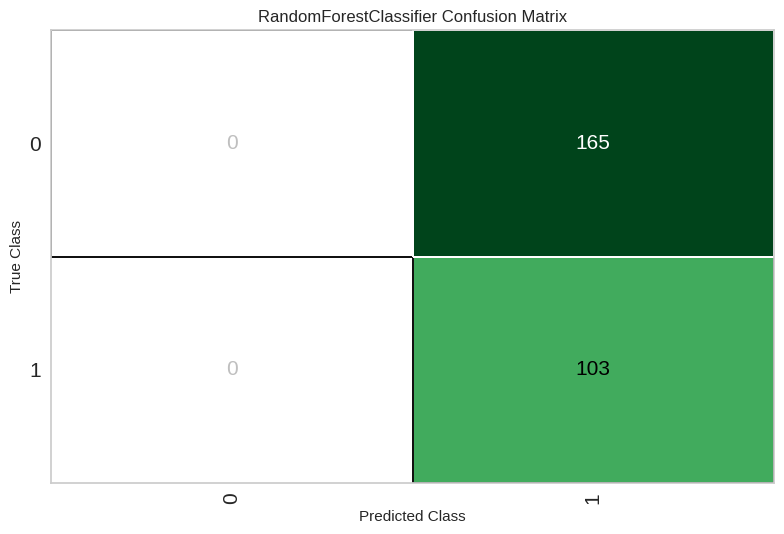

In [15]:
#create confusion matrix
plot_model(create_model('rf'), plot='confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.6998,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.8189,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.7938,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.8174,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.7703,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.7922,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.8640,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.6891,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.7659,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

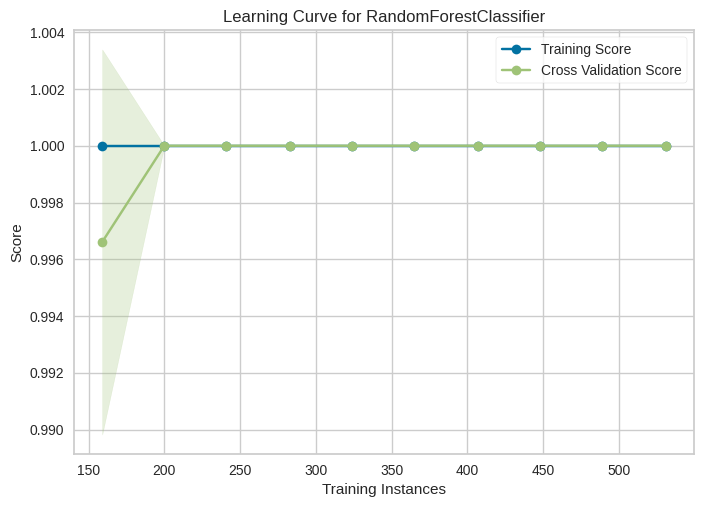

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.6998,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.8189,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.7938,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.8174,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.7703,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.7922,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.8640,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.6891,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.7659,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

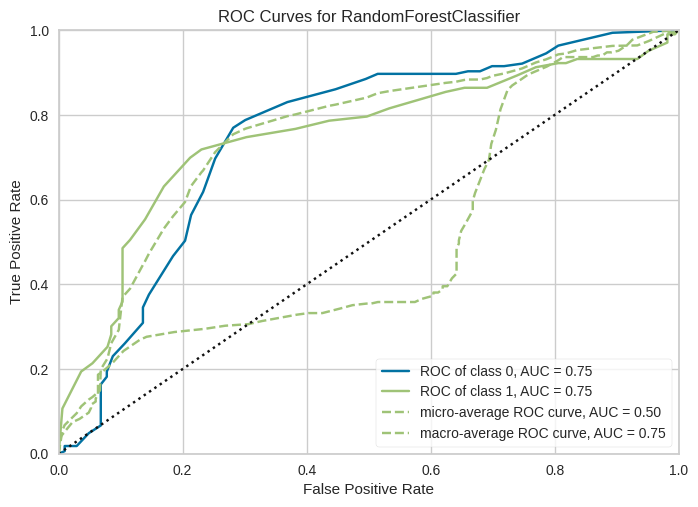

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.6998,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.8189,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.7938,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.8174,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.7703,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.7922,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.8640,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.6891,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.7659,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

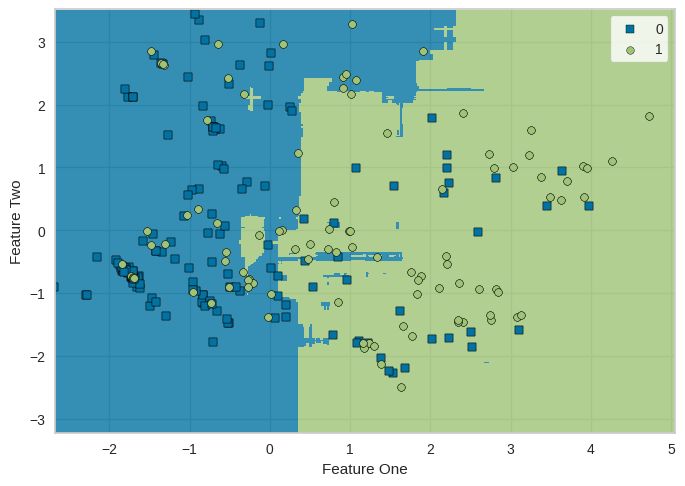

In [16]:
plot_model(create_model('rf'), plot='learning')
plot_model(create_model('rf'), plot='auc')
plot_model(create_model('rf'), plot='boundary')

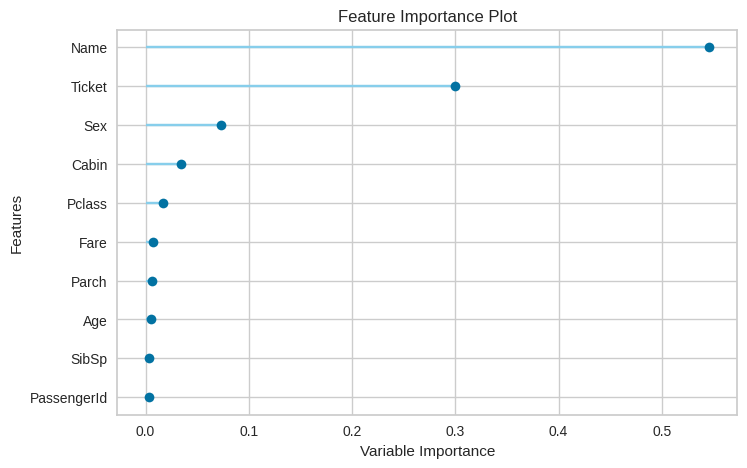

In [18]:
#Feature importance...
dtModel = create_model('et', verbose=False)
plot_model(dtModel, plot='feature')

In [19]:
#now tune the model....

In [20]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
1,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
2,0.3810,0.5000,1.0000,0.3810,0.5517,0.0000,0.0000
3,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000
4,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000
5,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000
6,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000
7,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000
8,0.3871,0.5000,1.0000,0.3871,0.5581,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
